In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(2805, 10)

In [4]:
train.isnull().sum()

Gender               0
Income               0
Education            3
Dependents           0
Marital Status       0
Employment Status    0
Mortgage             0
Resident             1
Credit               1
Risk Status          0
dtype: int64

1. Gender : Male/Female
2. Income : Applicant income (10000 - 500000)
3. Education : Applicant Education Level (Bachelor, Master, Doctorate, Others)
4. Dependent : Number of dependents
5. Marital Status : Single, Married, Divorced, Widowed, Separated
6. Employment Status: Employed, Employed Part-time, Self-employed, Unemployed, Retired, Others
7. Mortgage : Yes/No #การจำนอง
8. Resident : Urban/Semi-urban/Rural
9. Credit : Credit history meets guidelines (Yes/No)
10. Risk Status: 1/2/3/4/5 (1 = lowest risk, 5 = highest risk)

In [5]:
print(train['Education'].mode()), print(train['Resident'].mode()), print(train['Credit'].mode())

0    Bachelor
dtype: object
0    Urban
dtype: object
0    Yes
dtype: object


(None, None, None)

In [6]:
#for input missing data with mode
train['Education'] = train['Education'].fillna('Bachelor')
train['Resident'] = train['Resident'].fillna('Urban')
train['Credit'] = train['Credit'].fillna('Yes')

In [7]:
train.isnull().sum()

Gender               0
Income               0
Education            0
Dependents           0
Marital Status       0
Employment Status    0
Mortgage             0
Resident             0
Credit               0
Risk Status          0
dtype: int64

In [8]:
train.head()

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,28000,Others,0,Divorced,Retired,Yes,Semi-urban,No,4
1,Female,42000,Bachelor,2,Separated,Self-employed,No,Urban,No,3
2,Male,52000,Bachelor,0,Divorced,Others,Yes,Urban,No,3
3,Male,64000,Master,1,Single,Others,Yes,Urban,No,3
4,Female,126000,Master,1,Divorced,Self-employed,No,Urban,Yes,2


In [9]:
train['Marital Status'].value_counts()

Single       825
Divorced     589
Widowed      563
Married      526
Separated    302
Name: Marital Status, dtype: int64

In [10]:
train.groupby('Education').count()

,Gender,Income,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
Education,,,,,,,,,
Bachelor,1173,1173,1173,1173,1173,1173,1173,1173,1173
Doctorate,494,494,494,494,494,494,494,494,494
Master,725,725,725,725,725,725,725,725,725
Others,413,413,413,413,413,413,413,413,413


In [11]:
train['Education'].shape

(2805,)

In [12]:
train['Risk Status'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [13]:
def FilterRankbyDegree(degree):
    list=[]
    tfilter = train.loc[lambda train: train['Education'] == degree]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

In [14]:
print(FilterRankbyDegree('Doctorate'))

[30, 317, 139, 8, 0]


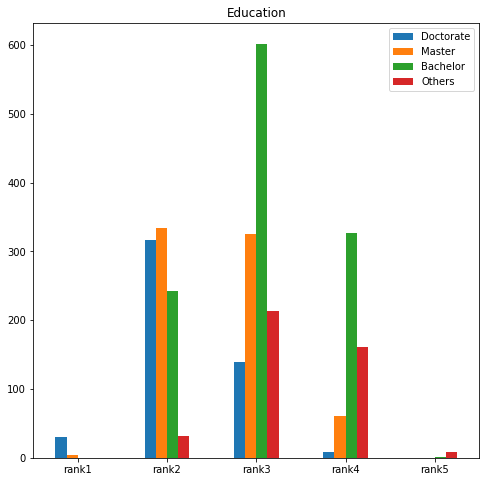

In [15]:
# Bachelor, Master, Doctorate, Others
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
degreeBar = pd.DataFrame({'Doctorate': FilterRankbyDegree('Doctorate'),
                   'Master': FilterRankbyDegree('Master'),
                   'Bachelor': FilterRankbyDegree('Bachelor'),    
                  'Others': FilterRankbyDegree('Others')}, index=index)
DegreeBar = degreeBar.plot.bar(title='Education', rot=0, figsize=(8,8))

In [16]:
def FilterDegreebyRank(rank):
    list=[]
    tfilter = train.loc[lambda train: train['Risk Status'] == rank]
    t_1 = sum(tfilter['Education']=='Doctorate')
    t_2 = sum(tfilter['Education']=='Master')
    t_3 = sum(tfilter['Education']=='Bachelor')
    t_4 = sum(tfilter['Education']=='Others')
    list.extend([t_1,t_2,t_3,t_4])
    return list

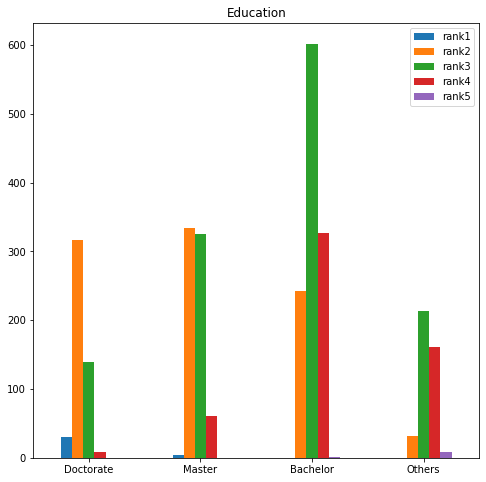

In [17]:
# Bachelor, Master, Doctorate, Others
index = ['Doctorate', 'Master', 'Bachelor', 'Others']
degreeBar = pd.DataFrame({'rank1': FilterDegreebyRank(1),
                   'rank2': FilterDegreebyRank(2),
                   'rank3': FilterDegreebyRank(3),    
                   'rank4': FilterDegreebyRank(4),
                   'rank5': FilterDegreebyRank(5)}, index=index)
DegreeBar = degreeBar.plot.bar(title='Education', rot=0, figsize=(8,8))

In [18]:
train['Dependents'].unique()

array([0, 2, 1, 4, 3, 5], dtype=int64)

In [19]:
def FilterRankbyDependents(dependent):
    list=[]
    tfilter = train.loc[lambda train: train['Dependents'] == dependent]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

In [20]:
FilterRankbyDependents(1)

[10, 423, 589, 223, 2]

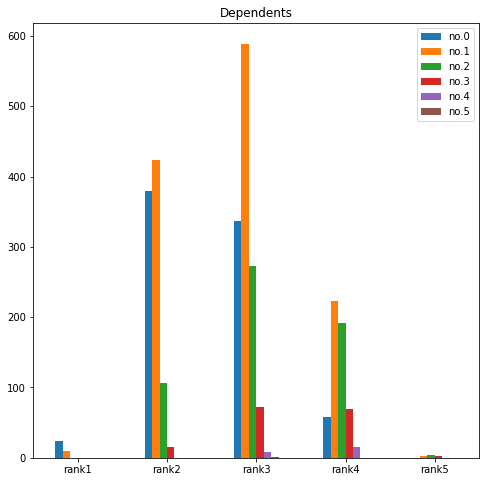

In [21]:
# 0,1,2,3,4,5
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
df = pd.DataFrame({'no.0': FilterRankbyDependents(0),
                   'no.1': FilterRankbyDependents(1),
                   'no.2': FilterRankbyDependents(2),    
                  'no.3': FilterRankbyDependents(3),
                  'no.4':FilterRankbyDependents(4),
                  'no.5':FilterRankbyDependents(5)}, index=index)
DependentBar = df.plot.bar(title='Dependents', rot=0, figsize=(8,8))

In [22]:
def FilterRankbyMaritalStatus(status):
    list=[]
    tfilter = train.loc[lambda train: train['Marital Status'] == status]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

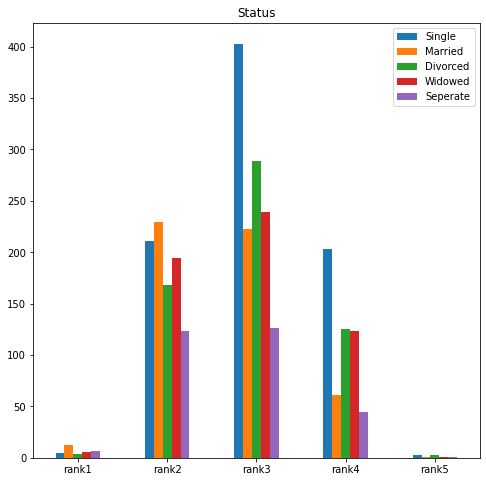

In [23]:
# Single, Married, Divorced, Widowed, Separated
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
statusBar = pd.DataFrame({'Single': FilterRankbyMaritalStatus('Single'),
                   'Married': FilterRankbyMaritalStatus('Married'),
                   'Divorced': FilterRankbyMaritalStatus('Divorced'),    
                  'Widowed': FilterRankbyMaritalStatus('Widowed'),
                  'Seperate':FilterRankbyMaritalStatus('Separated')}, index=index)
StatusBar = statusBar.plot.bar(title='Status', rot=0, figsize=(8,8))

In [24]:
def FilterRankbyEmployment(employ):
    list=[]
    tfilter = train.loc[lambda train: train['Employment Status'] == employ]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

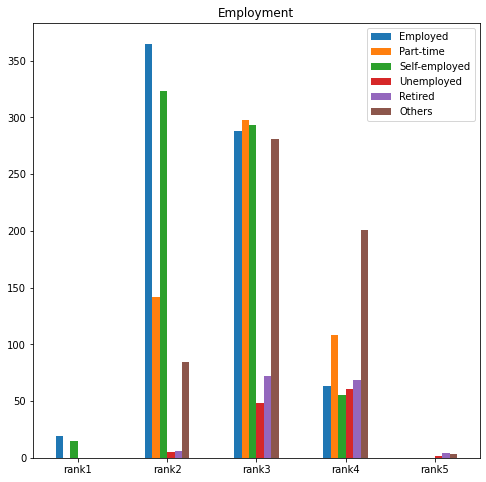

In [25]:
# Employed, Employed Part-time, Self-employed, Unemployed, Retired, Others
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
employBar = pd.DataFrame({'Employed':FilterRankbyEmployment('Employed'),
                  'Part-time':FilterRankbyEmployment('Part-time'),
                  'Self-employed':FilterRankbyEmployment('Self-employed'),
                  'Unemployed':FilterRankbyEmployment('Unemployed'),
                  'Retired':FilterRankbyEmployment('Retired'),
                  'Others':FilterRankbyEmployment('Others')}, index=index)
EmployBar = employBar.plot.bar(title='Employment', rot=0,figsize=(8,8))

In [26]:
def FilterRankbyResident(resident):
    list=[]
    tfilter = train.loc[lambda train: train['Resident'] == resident]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

In [27]:
print(FilterRankbyResident('Urban'))
print(FilterRankbyResident('Semi-urban'))
print(FilterRankbyResident('Rural'))

[29, 593, 584, 159, 0]
[3, 241, 469, 237, 3]
[2, 91, 227, 161, 6]


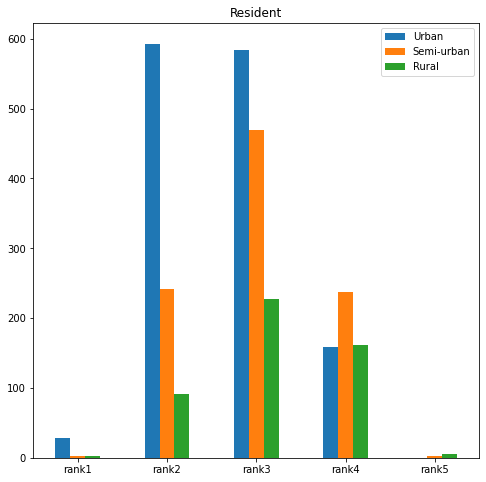

In [28]:
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
residentBar = pd.DataFrame({'Urban': FilterRankbyResident('Urban'),
                   'Semi-urban': FilterRankbyResident('Semi-urban'),
                   'Rural': FilterRankbyResident('Rural')}, index=index)
ResidentBar = residentBar.plot.bar(title='Resident', rot=0,figsize=(8,8))

In [29]:
# plt.subplot(2,2,1)
# degreeBar.plot.bar(rot=0, figsize=(8,8))
# plt.subplot(2,2,2)
# statusBar.plot.bar(rot=0, figsize=(8,8))
# plt.subplot(2,2,3)
# employBar.plot.bar(rot=0, figsize=(8,8))
# plt.subplot(2,2,4)
# residentBar.plot.bar(rot=0, figsize=(8,8))
# plt.show()

In [30]:
r1 = train.loc[lambda train: train['Risk Status'] == 1]
r2 = train.loc[lambda train: train['Risk Status'] == 2]
r3 = train.loc[lambda train: train['Risk Status'] == 3]
r4 = train.loc[lambda train: train['Risk Status'] == 4]
r5 = train.loc[lambda train: train['Risk Status'] == 5]

In [31]:
train['Risk Status'].value_counts()

3    1280
2     925
4     557
1      34
5       9
Name: Risk Status, dtype: int64

In [32]:
no1 = train.loc[lambda train: train['Dependents'] == 1]
no2 = train.loc[lambda train: train['Dependents'] == 2]
no3 = train.loc[lambda train: train['Dependents'] == 3]
no4 = train.loc[lambda train: train['Dependents'] == 4]
no5 = train.loc[lambda train: train['Dependents'] == 5]

In [33]:
def FilterRankbyGender(gender):
    list=[]
    tfilter = train.loc[lambda train: train['Gender'] == gender]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

In [34]:
train['Gender'].value_counts()

Male      1463
Female    1342
Name: Gender, dtype: int64

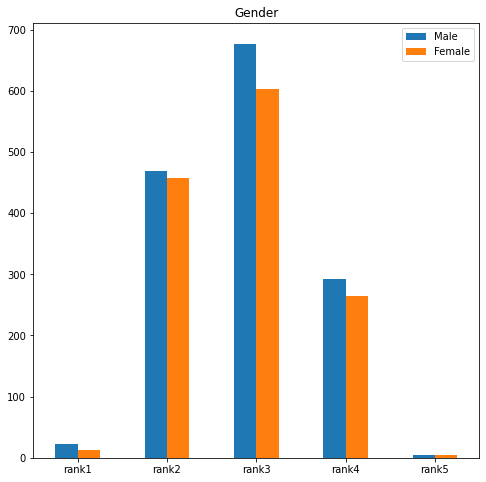

In [35]:
# Male/Female
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
genderBar = pd.DataFrame({'Male': FilterRankbyGender('Male'),
                   'Female': FilterRankbyGender('Female')}, index=index)
GenderBar = genderBar.plot.bar(title='Gender', rot=0,figsize=(8,8))

In [36]:
def FilterRankbyMortgage(mortgage):
    list=[]
    tfilter = train.loc[lambda train: train['Mortgage'] == mortgage]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

In [37]:
train['Mortgage'].value_counts()

Yes    2040
No      765
Name: Mortgage, dtype: int64

In [38]:
print(FilterRankbyMortgage('Yes'))
print(FilterRankbyMortgage('No'))

[34, 817, 936, 253, 0]
[0, 108, 344, 304, 9]


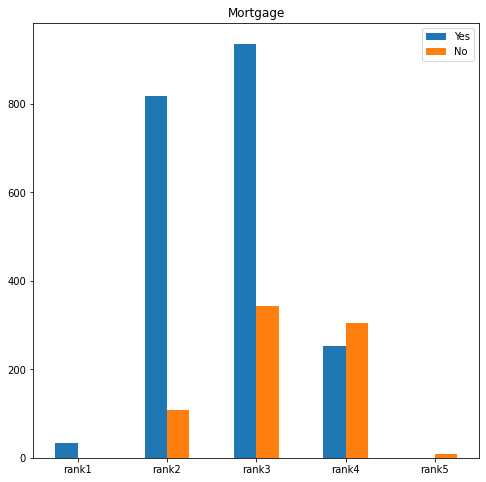

In [39]:
# Yes/No
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
mortgageBar = pd.DataFrame({'Yes': FilterRankbyMortgage('Yes'),
                   'No': FilterRankbyMortgage('No')}, index=index)
MortgageBar = mortgageBar.plot.bar(title='Mortgage',rot=0,figsize=(8,8))

In [40]:
def FilterRankbyCredit(credit):
    list=[]
    tfilter = train.loc[lambda train: train['Credit'] == credit]
    t_1 = sum(tfilter['Risk Status']==1)
    t_2 = sum(tfilter['Risk Status']==2)
    t_3 = sum(tfilter['Risk Status']==3)
    t_4 = sum(tfilter['Risk Status']==4)
    t_5 = sum(tfilter['Risk Status']==5)
    list.extend([t_1,t_2,t_3,t_4,t_5])
    return list

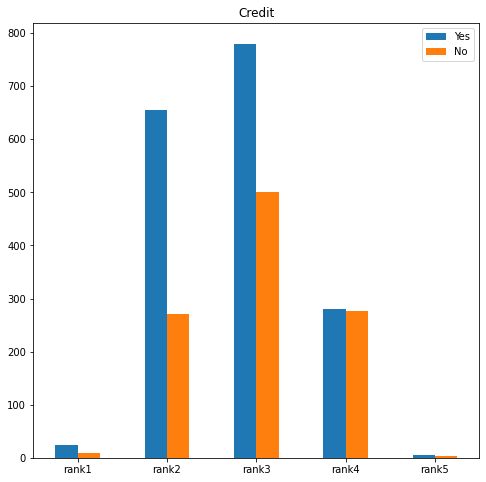

In [41]:
# Yes/No
index = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']
creditBar = pd.DataFrame({'Yes': FilterRankbyCredit('Yes'),
                   'No': FilterRankbyCredit('No')}, index=index)
CreditBar = creditBar.plot.bar(title='Credit', rot=0, figsize=(8,8))

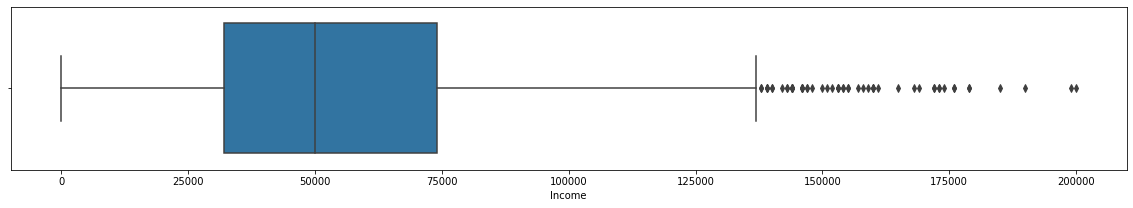

In [42]:
plt.figure(figsize=(20,3))
ax = sns.boxplot(x=train["Income"])

C:\Users\ninga\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ninga\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ninga\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ninga\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


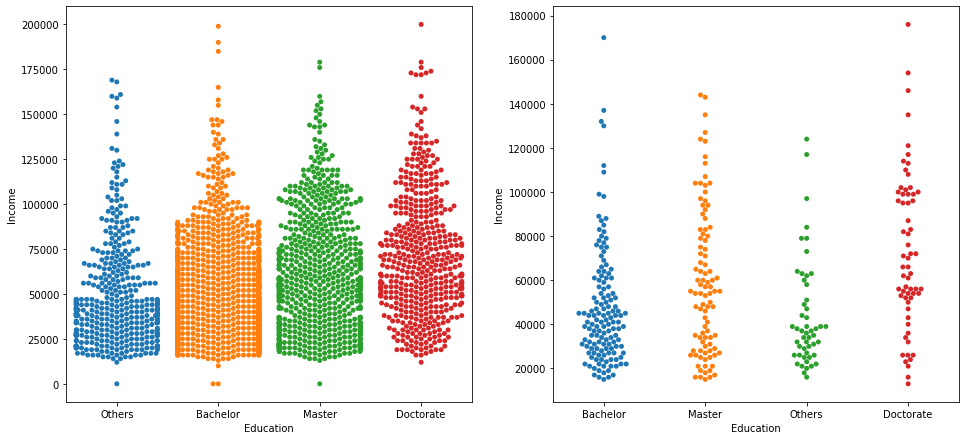

In [43]:
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
sns.swarmplot(x='Education', y='Income', data=train)
plt.subplot(2,2,2)
sns.swarmplot(x='Education', y='Income', data=test)
plt.show()

In [45]:
train['Income'].describe()

count      2805.000000
mean      56679.145811
std       31457.184954
min           1.000000
25%       32000.000000
50%       50000.000000
75%       74000.000000
max      200000.000000
Name: Income, dtype: float64

In [46]:
test['Income'].describe()

count       350.000000
mean      54914.285714
std       31472.525362
min       13000.000000
25%       30250.000000
50%       47000.000000
75%       72000.000000
max      176000.000000
Name: Income, dtype: float64

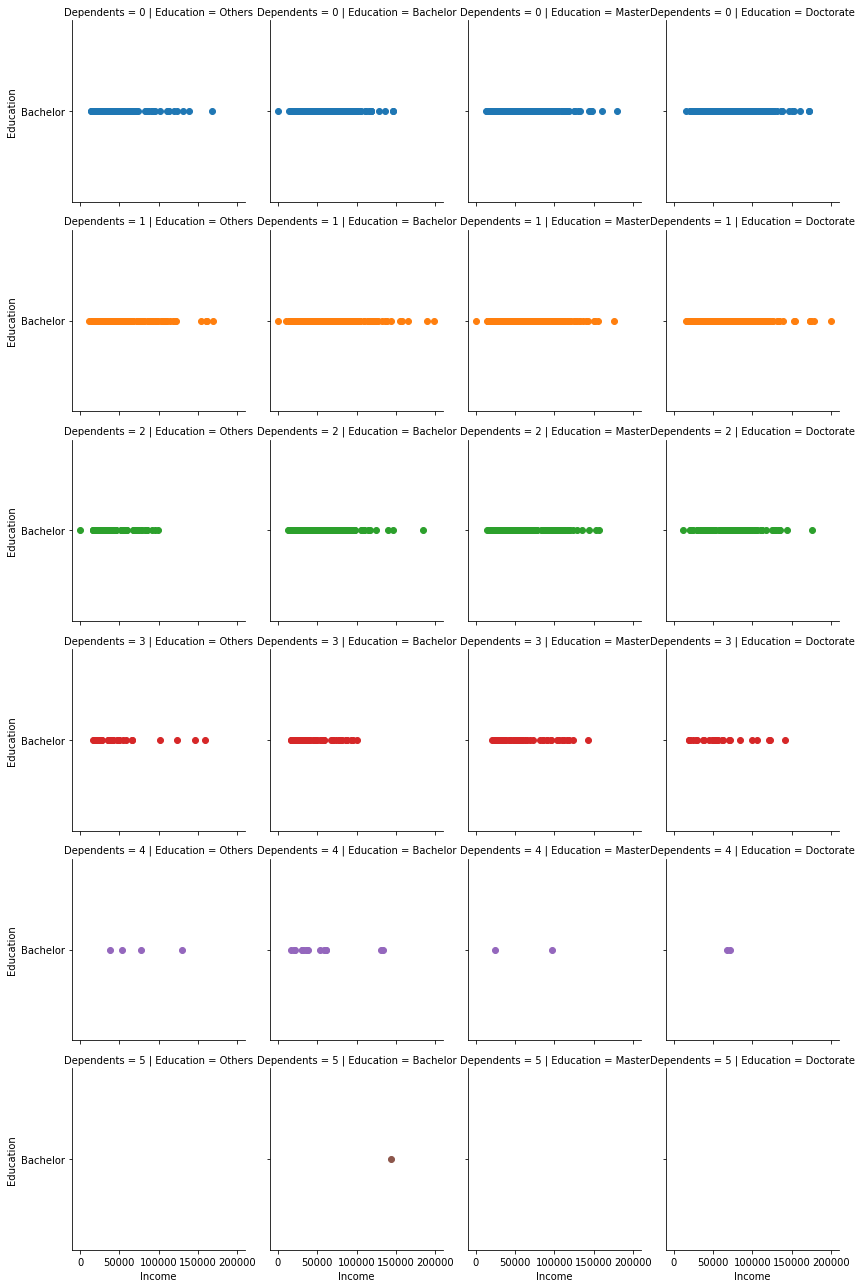

In [47]:
g = sns.FacetGrid(train,row="Dependents",col="Education",hue='Dependents')
g = g.map(plt.scatter, 'Income', 'Education')

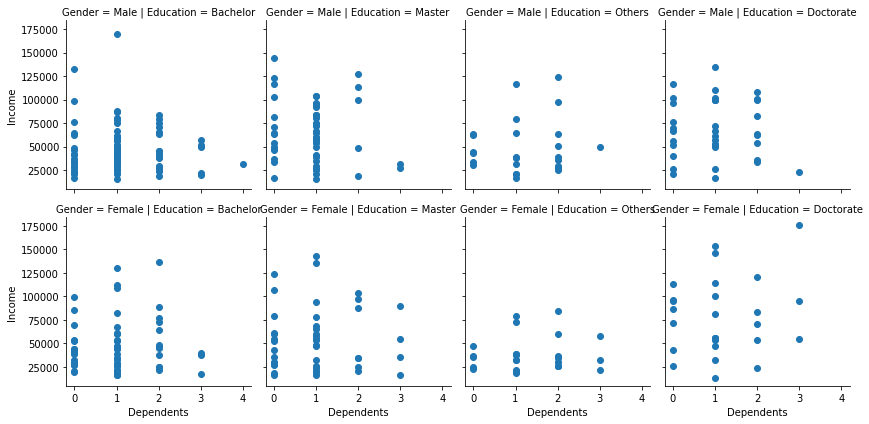

In [49]:
g = sns.FacetGrid(test,row="Gender",col="Education")
g = g.map(plt.scatter, 'Dependents', 'Income')

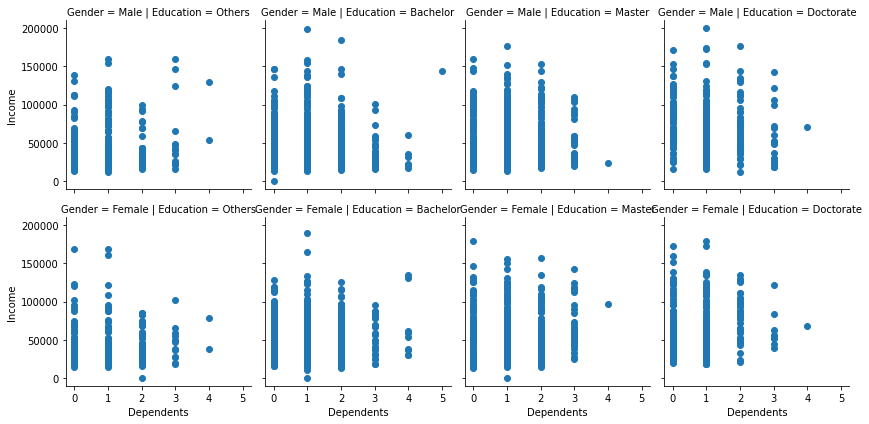

In [50]:
g = sns.FacetGrid(train,row="Gender",col="Education")
g = g.map(plt.scatter, 'Dependents', 'Income')

In [ ]:
labels_5 = [1, 2, 3, 4, 5]
train['Income_rank'] = pd.qcut(train['Income'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=labels_5)
train.head()

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Dependents', y='Income', data=test)

In [ ]:
train['Income'].describe()

In [ ]:
pd.qcut(train['Income'], q=5)